## Aula 14 - Feature Engineering

#### Machine Learning Pipeline
![Machine Learning Pipeline](https://cdn-images-1.medium.com/max/1600/1*2T5rbjOBGVFdSvtlhCqlNg.png)


##### Feature Engineering is an art

> "Each problem is domain specific and better features (suited to the problem) is often the **deciding factor** of the performance of your system."
> "Data Scientists often spend 70% of their time in the data preparation phase before modeling."               
> — [Link 1](https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b) do pré-aula.

> “Coming up with features is difficult, time-consuming, requires expert knowledge. ‘Applied machine learning’ is basically feature engineering."
> — [Prof. Andrew Ng.](https://en.wikipedia.org/wiki/Andrew_Ng) (Stanford)

> “Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used.”  
> — [Prof. Pedro Domingos](https://en.wikipedia.org/wiki/Pedro_Domingos) (University of Washington)



==============================================
#### Dataset: dados históricos dos funcionários.
#### Tarefa: prever promoção do funcionário
==============================================

#### Importando o que precisaremos...

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from plotting import plot_confusion_matrix

In [2]:
data = pd.read_csv('data/Base Analytics.csv')
data.sample(5)

,ADP,Admissão,Desligamento,Desligado?,Iniciativa Desligamento,Tempo de Casa,Cod.Cargo,Cargo,Cod.Cargo Admissão,Cargo Admissão,...,MERITO 2015,MERITO 2016,MERITO 2017,PROMOÇÃO 2012,PROMOÇÃO 2013,PROMOÇÃO 2014,PROMOÇÃO 2015,PROMOÇÃO 2016,PROMOÇÃO 2017,PROMOVIDO
41,71,8/1/2007,,N,NaN,11.4,954,ANALISTA SR,671,ASSISTENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
336,366,8/4/2014,1/19/2015,Y,Funcionário,0.5,891,ANALISTA JR,891,ANALISTA JR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
314,344,4/22/2014,,N,NaN,4.7,958,COORDENADOR,882,ANALISTA PL,...,NaN,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,1
476,506,8/3/2015,,N,NaN,3.4,909,ANALISTA PL,909,ANALISTA PL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
220,250,1/21/2013,,N,NaN,5.9,744,ANALISTA PL,744,ANALISTA PL,...,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,0


### Numerical Data

#### Filtrando numericos e excluindo nulos...

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data = data[data['Admissão'] >= '2011-01-01'].reset_index().drop(columns='index')
data_num = data.select_dtypes(include=numerics).copy()
data_num = data_num.drop(columns=['ADP', 'Cod.Cargo', 'Cod.Cargo Admissão', 'CC', 
                                              'Hora Extra 2016', 'Hora Negativa 2016', 'Ad. Noturno 2016', 
                                              'Absenteísmo 2016', 'Hora Extra 2017', 'Hora Negativa 2017', 
                                              'Ad. Noturno 2017', 'Absenteísmo 2017', 'Banda', 
                                              '2012/13 Goal Achievement'], axis=1)

In [4]:
data_old = data_num.dropna()
data_old.shape

(83, 8)

In [5]:
X = data_old.drop(columns='PROMOVIDO')
y = data_old['PROMOVIDO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix, without normalization
[[11  3]
 [ 4  7]]


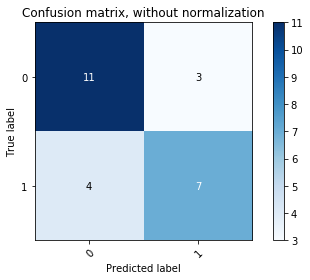

Normalized confusion matrix
[[0.78571429 0.21428571]
 [0.36363636 0.63636364]]


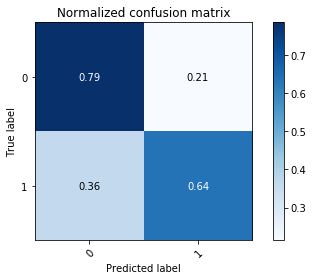

In [6]:
_ = plot_confusion_matrix(y_test, y_pred)
_ = plot_confusion_matrix(y_test, y_pred, normalize='yes')

#### E se ao invés de excluir os nulos, substituíssemos pela média?

In [7]:
data_num.describe()

,Tempo de Casa,Idade Atual/ Desligamento,Idade na Admissão,2013/14 Goal Achievement,2014/15 Goal Achievement,2015/16 Goal Achievement,2016/17 Goal Achievement,PROMOVIDO
count,356.000000,356.000000,356.000000,111.000000,127.000000,208.000000,213.000000,356.000000
mean,4.228652,35.978875,32.940388,90.718018,106.937795,102.965385,104.440376,0.216292
std,2.954284,8.589197,8.318959,13.818730,10.135056,8.303672,7.460852,0.412295
min,0.000000,19.000000,18.734247,0.000000,80.000000,77.100000,75.600000,0.000000
25%,2.100000,29.899315,26.969863,89.500000,100.000000,99.900000,100.900000,0.000000
50%,3.600000,34.906849,31.479452,94.000000,105.000000,103.200000,103.800000,0.000000
75%,5.600000,41.585616,37.808904,97.000000,110.350000,107.500000,107.300000,0.000000
max,16.400000,65.736986,63.161644,100.000000,135.900000,132.000000,132.200000,1.000000


In [8]:
for col in data_num.columns:
    qtt = data_num[col].isnull().sum()
    if qtt > 0:
        print(col, qtt)
        data_num.update(data_num[col].fillna(data_num[col].mean()))

2013/14 Goal Achievement 245
2014/15 Goal Achievement 229
2015/16 Goal Achievement 148
2016/17 Goal Achievement 143


In [9]:
X = data_num.drop(columns=['PROMOVIDO'])
y = data_num['PROMOVIDO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix, without normalization
[[67 23]
 [ 3 14]]


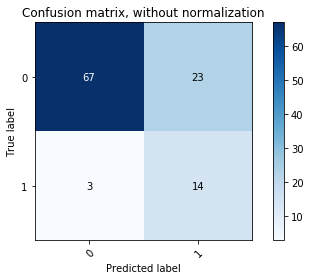

Normalized confusion matrix
[[0.74444444 0.25555556]
 [0.17647059 0.82352941]]


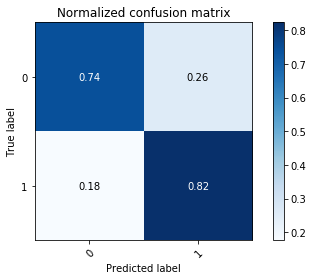

In [10]:
_ = plot_confusion_matrix(y_test, y_pred)
_ = plot_confusion_matrix(y_test, y_pred, normalize='yes')

Normalized confusion matrix
[[0.74444444 0.25555556]
 [0.17647059 0.82352941]]


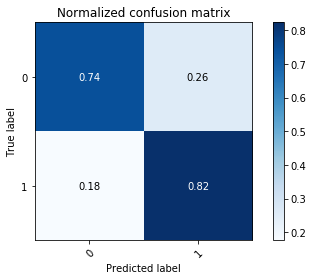

In [11]:
_ = plot_confusion_matrix(y_test, y_pred, normalize='yes')

[Scaler](https://scikit-learn.org/0.19/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [12]:
scaler = StandardScaler()
data_num_scaled = pd.DataFrame(scaler.fit_transform(data_num.drop(columns='PROMOVIDO')),
                               columns=list(data_num.drop(columns='PROMOVIDO').columns))

In [13]:
X = data_num_scaled
y = data_num['PROMOVIDO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix, without normalization
[[77 13]
 [ 4 13]]


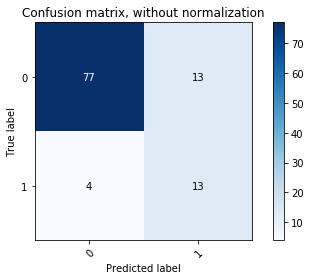

Normalized confusion matrix
[[0.85555556 0.14444444]
 [0.23529412 0.76470588]]


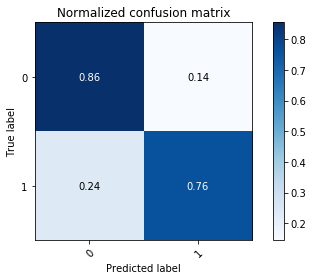

In [14]:
_ = plot_confusion_matrix(y_test, y_pred)
_ = plot_confusion_matrix(y_test, y_pred, normalize='yes')

[RobustScaler](https://scikit-learn.org/0.19/modules/generated/sklearn.preprocessing.RobustScaler.html)

In [15]:
rscaler = RobustScaler()
data_num_rscaled = pd.DataFrame(rscaler.fit_transform(data_num.drop(columns='PROMOVIDO')),
                               columns=list(data_num.drop(columns='PROMOVIDO').columns))

In [16]:
X = data_num_rscaled
y = data_num['PROMOVIDO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix, without normalization
[[77 13]
 [ 4 13]]


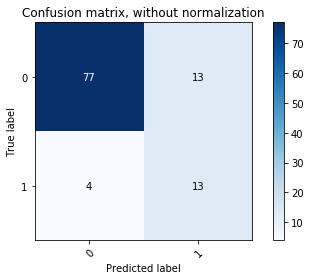

Normalized confusion matrix
[[0.85555556 0.14444444]
 [0.23529412 0.76470588]]


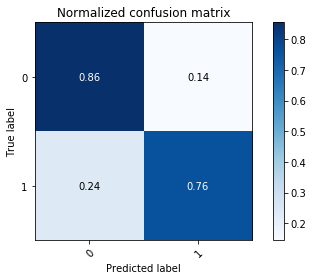

In [17]:
_ = plot_confusion_matrix(y_test, y_pred)
_ = plot_confusion_matrix(y_test, y_pred, normalize='yes')

#### Binarization
- Ao invés de um count, por exemplo, usar somente a informação de ter ou não aquela informação.
- Exemplo: quantas vezes cada usuário ouviu uma música vs. se ouviu ou não uma música.
- No contexto do nosso dataset: se tivéssemos uma coluna que só dissesse quando foi o último aumento do funcionário, poderíamos usar somente a informação se houve aumento ou não.

#### Interaction between features
- Além dos valores individuais, podemos extrair informação importante da interação que pode haver entre features.
- No contexto nosso dataset?

#### Binning
- Podem haver valores muito raros, mas próximos de valores mais numerosos; é relevante a informação granular?
- Também podemos ter maior interesse em um grupo - ex: público alvo por idade;
- No contexto do nosso dataset?

#### Rounding
- Mesma ideia do binning
- Exemplos?
- E no contexto nosso dataset?

#### Statistical Transformation 
- Log: Log transforms are useful when applied to skewed distributions as they tend to expand the values which fall in the range of lower magnitudes and tend to compress or reduce the values which fall in the range of higher magnitudes.
- Box-Cox